##Predicciones

#### Utilitarios

In [15]:
import joblib
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score,roc_curve,recall_score,mean_squared_error, r2_score, mean_absolute_error

### PREDICCION DE CREDITO

In [ ]:
# A1, A2, A3, A4, A5, A6 son continuas
# R1 solicitud respuesta
creditodata = pd.read_csv('credito.txt', sep='\t')

y= creditodata[['R1']]
x = creditodata.drop('R1', axis=1)
xtrain ,xtest, ytrain, ytest = train_test_split(x,y,test_size=0.4,random_state=42)
print(creditodata.head(5))



   A1     A2     A3    A8  A9  A10  A11  A12  A14  A15  R1
0   1  30.83  0.000  1.25   1    0    1    1  202    0   1
1   0  58.67  4.460  3.04   1    0    6    1   43  560   1
2   0  24.50  0.500  1.50   1    1    0    1  280  824   1
3   1  27.83  1.540  3.75   1    0    5    0  100    3   1
4   1  20.17  5.625  1.71   1    1    0    1  120    0   1


##### Usando Logistic Regression
<p>Debido a las variables a implementar solo continuas y boleanas, considerando que no se tendra que tomar otros detalles en cuenta mas alla de variables numericas es idoneo almenos para este ejercicio</p>

In [ ]:
#entrenando modelo y prediciendo
regresion = LogisticRegression(solver='lbfgs', max_iter=1000)
regresion.fit(xtrain,ytrain.values.ravel())
yprediccion = regresion.predict(xtest)

In [ ]:
#evaluando modelo
precisión = accuracy_score(ytest,yprediccion)
sensitividad = recall_score(ytest, yprediccion)
confusion = confusion_matrix(ytest,yprediccion)
clasificacion = classification_report(ytest,yprediccion)
rocscore = roc_auc_score(ytest,yprediccion)

tn, fp, fn, tp = confusion.ravel()
especificidad = tn / (tn + fp)

print('Precisión: {:.2f}%'.format(precisión*100))
print('Sensitividad: {:.2f}%'.format(sensitividad*100))
print('Especifidad: {:.2f}%'.format(especificidad*100))
print('Prediccion de prueba:',yprediccion)

Precisión: 83.97%
Sensitividad: 93.75%
Especifidad: 76.67%
Prediccion de prueba: [0 1 1 0 1 0 1 1 1 1 0 1 0 1 1 0 0 1 0 1 1 1 0 0 0 1 0 1 0 0 0 0 0 0 1 0 1
 0 0 1 0 0 1 1 1 1 0 1 0 0 1 0 1 0 1 0 1 0 0 1 1 0 1 1 1 1 1 1 1 1 0 1 0 1
 0 0 1 0 1 1 1 1 1 1 1 0 1 0 0 1 0 0 0 0 0 1 1 1 1 1 0 0 0 1 1 1 0 0 1 1 1
 1 1 1 1 1 1 0 0 1 1 1 0 0 0 1 0 0 1 0 1 0 0 0 1 1 0 1 0 0 1 0 0 0 0 1 0 0
 0 0 0 0 0 1 1 0 1 1 1 1 1 1 1 0 0 1 1 0 1 1 0 1 0 1 1 1 1 1 0 1 0 0 1 0 0
 1 1 0 0 0 1 1 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 1 0 1 1 1 0 1 1 0 0 1 1 1
 1 0 1 1 0 1 0 1 0 1 1 1 1 0 0 1 1 0 1 1 1 1 1 1 1 0 0 0 1 0 0 0 1 1 1 1 0
 0 0 1]


In [ ]:
#predecir las probabilidades
probabilidad = regresion.predict_proba(xtest)[:, 1]

# calcular la curva ROC y las tasas de verdaderos positivos y falsos positivos
fpr, tpr, thresholds = roc_curve(ytest, probabilidad)
# calcular el área bajo la curva ROC (AUC)
auc = roc_auc_score(ytest, probabilidad)

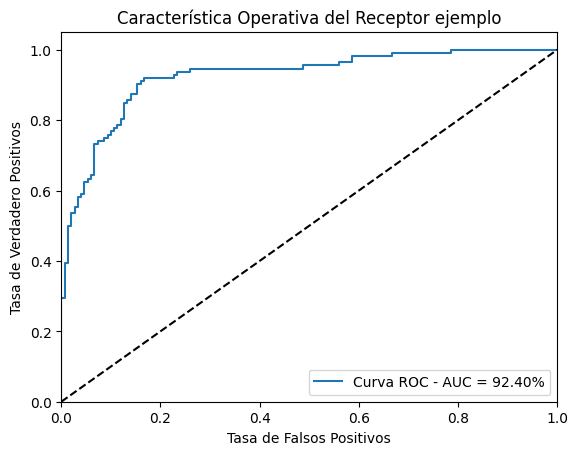

In [ ]:
# graficar la curva ROC
plt.plot(fpr, tpr, label='Curva ROC - AUC = %0.2f' % (auc*100)+'%')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdadero Positivos')
plt.title('Característica Operativa del Receptor ejemplo')
plt.legend(loc="lower right")
plt.show()

##### Usando RandomForestClassifier
<p>usando RandomForestClassifier para ser mas insicivo y constatar a razon de buscar mayor presicion</p>

In [ ]:
y= creditodata[['R1']]
x = creditodata.drop('R1', axis=1)
xtrain ,xtest, ytrain, ytest = train_test_split(x,y,test_size=0.4,random_state=42)
print(creditodata.head(5))

   A1     A2     A3    A8  A9  A10  A11  A12  A14  A15  R1
0   1  30.83  0.000  1.25   1    0    1    1  202    0   1
1   0  58.67  4.460  3.04   1    0    6    1   43  560   1
2   0  24.50  0.500  1.50   1    1    0    1  280  824   1
3   1  27.83  1.540  3.75   1    0    5    0  100    3   1
4   1  20.17  5.625  1.71   1    1    0    1  120    0   1


In [ ]:
#entrenando modelo y prediciendo
clasificacion = RandomForestClassifier(n_estimators=100, random_state=42)
clasificacion.fit(xtrain,ytrain.values.ravel())
yprediccion = clasificacion.predict(xtest)
probabilidad = clasificacion.predict_proba(xtest)[:, 1]

In [ ]:
#evaluando modelo
precisión = accuracy_score(ytest,yprediccion)
sensitividad = recall_score(ytest, yprediccion)
confusion = confusion_matrix(ytest,yprediccion)
clasificacion = classification_report(ytest,yprediccion)
rocscore = roc_auc_score(ytest,yprediccion)

tn, fp, fn, tp = confusion.ravel()
especificidad = tn / (tn + fp)

print('Precisión: {:.2f}%'.format(precisión*100))
print('Sensitividad: {:.2f}%'.format(sensitividad*100))
print('Especifidad: {:.2f}%'.format(especificidad*100))
print('Prediccion de prueba:',yprediccion)

Precisión: 84.73%
Sensitividad: 91.07%
Especifidad: 80.00%
Prediccion de prueba: [0 1 1 0 0 0 1 1 1 1 0 1 0 1 1 0 0 1 0 1 1 1 0 0 0 1 0 1 0 0 0 0 0 0 1 0 1
 0 0 1 0 0 1 1 1 1 0 1 0 0 1 0 1 0 1 0 1 0 0 1 1 0 0 1 1 1 1 1 1 1 0 1 0 1
 0 0 1 1 1 0 1 1 1 1 1 0 1 0 0 1 0 0 0 0 0 1 1 1 1 1 0 0 0 1 1 0 0 0 0 0 1
 1 1 1 1 1 1 0 0 1 1 1 0 0 0 1 0 0 1 0 1 0 0 0 1 1 0 1 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 1 1 0 1 1 1 1 1 1 1 0 0 1 1 0 1 1 0 1 0 1 1 1 0 1 0 1 0 0 1 0 0
 1 1 0 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 1 1 1 0 1 1 0 0 1 1 1
 1 0 1 1 1 1 0 1 0 1 1 1 1 0 0 1 1 0 1 1 1 0 1 1 1 0 0 0 1 0 0 0 1 1 1 1 0
 0 0 1]


In [ ]:
#predecir las probabilidades
probabilidad = probabilidad
# calcular la curva ROC y las tasas de verdaderos positivos y falsos positivos
fpr, tpr, thresholds = roc_curve(ytest, probabilidad)
# calcular el área bajo la curva ROC (AUC)
auc = roc_auc_score(ytest, probabilidad)

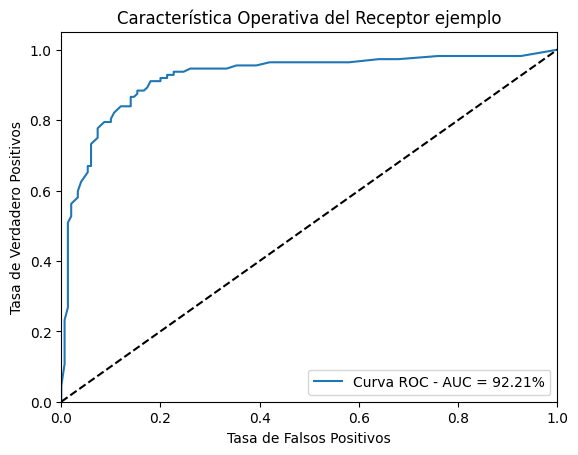

In [ ]:
# graficar la curva ROC
plt.plot(fpr, tpr, label='Curva ROC - AUC = %0.2f' % (auc*100)+'%')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdadero Positivos')
plt.title('Característica Operativa del Receptor ejemplo')
plt.legend(loc="lower right")
plt.show()

#### Interpretacion
<p>Despues de evaluar varias graficas, y considerando el modelo de prediccion de randomforest como el mas certero, se puede considerar que cuenta con un buena prestacion a razon de las prediccion a realizar a base del model en un nivel de 40% de prueba usado</p>

<p>Considerando que se esta analizando un modelo de prediccion Crediticia, se considera un modelo certero, teniendo en cuenta, que se acerca bastante a metricas aceptables para las predicciones establecidas.</p>

<p>Tomando en cuenta que las metricas de especifidad que dicta una buena prediccion de falsos positivos, indicando que tiene buena deteccion de falsos positivos, queriendo decir que el modelo perfectamente podra tener muchos casos certeros teniendo en cuenta que las otras metricas de presicion y sensitividad a razon de los true-positives tambien son certeros</p>

<p>En conclusion vemos que la grafica al representar un 0.9221, considerando un porcentaje a 92.21%, es un indicativo que al estar cerca de 1 cuenta con un buen nivel de discriminacion</p>

### PREDICCION DE CRIMEN

In [16]:
crimendata = pd.read_csv('crimen.txt', sep='\t')
y= crimendata[['Crime']]
x = crimendata.drop('Crime', axis=1)
xtrain ,xtest, ytrain, ytest = train_test_split(x,y,test_size=0.4,random_state=42)
print(crimendata.head(5))
predictores = x.columns
respuesta = y.columns

cadena = ''
for row in predictores:
  cadena += row+'| '
print("\nPREDICTORES: "+cadena)



      M  So    Ed   Po1   Po2     LF    M.F  Pop    NW     U1   U2  Wealth  \
0  15.1   1   9.1   5.8   5.6  0.510   95.0   33  30.1  0.108  4.1    3940   
1  14.3   0  11.3  10.3   9.5  0.583  101.2   13  10.2  0.096  3.6    5570   
2  14.2   1   8.9   4.5   4.4  0.533   96.9   18  21.9  0.094  3.3    3180   
3  13.6   0  12.1  14.9  14.1  0.577   99.4  157   8.0  0.102  3.9    6730   
4  14.1   0  12.1  10.9  10.1  0.591   98.5   18   3.0  0.091  2.0    5780   

   Ineq      Prob     Time  Crime  
0  26.1  0.084602  26.2011    791  
1  19.4  0.029599  25.2999   1635  
2  25.0  0.083401  24.3006    578  
3  16.7  0.015801  29.9012   1969  
4  17.4  0.041399  21.2998   1234  

PREDICTORES: M| So| Ed| Po1| Po2| LF| M.F| Pop| NW| U1| U2| Wealth| Ineq| Prob| Time| 


#### Random Forest Regression
<p>considerando que en el dataset se pueden ver multiples relaciones considerando la principal de edad, empleabilidad y antecendentes, se ven algunas tendencias interesantes</p>

In [17]:
#entrenando modelo y prediciendo
regression = RandomForestRegressor(n_estimators=100, max_depth=None, random_state=42)
regression.fit(xtrain,ytrain.values.ravel())

joblib.dump(regression, 'random_forest_model.pkl')
yprediccion = regression.predict(xtest)

In [18]:
# Evaluate the model
mse = mean_squared_error(ytest, yprediccion)
mae = mean_absolute_error(ytest, yprediccion)
r2 = r2_score(ytest, yprediccion)

print('Mean Squared Error: %0.2f' % mse)
print('Mean Absolute Error: %0.2f' % mae)
print('R² Score: %0.2f' % r2)

Mean Squared Error: 125861.09
Mean Absolute Error: 219.77
R² Score: 0.31


<table>
  <thead>
    <tr>
      <th>Variable</th>
      <th>Descripcion</th>
    </tr>
  <thead>
  <tbody>
    <tr>
      <td>M</td>
      <td>Porcentaje de masculinos con edad de 14-24 de la poblacion</td>
    </tr>
    <tr>
        <td>So</td>
        <td>Indicador de estancia en estados del sur</td>
    </tr>
    <tr>
        <td>Ed</td>
        <td>Media de edad superior a 24 anios con escolaridad</td>
    </tr>
    <tr>
        <td>Po1</td>
        <td>Gasto per cápita en protección policial en 1960</td>
    </tr>
    <tr>
        <td>Po2</td>
        <td>Gasto per cápita en protección policial en 1959</td>
    </tr>
    <tr>
        <td>LF</td>
        <td>Tasa de participacion laboral de masculinos entre 14 - 24 anios</td>
    </tr>
    <tr>
        <td>M.F</td>
        <td>Numero de hombres por cada 100 mujeres</td>
    </tr>
    <tr>
        <td>Pop</td>
        <td>Poblacion del 1960 en cientos de miles</td>
    </tr>
    <tr>
        <td>NW</td>
        <td>Porcentaje de No Blancos</td>
    </tr>
    <tr>
        <td>U1</td>
        <td>Tasa de desempleo en ciudad de masculinos de 14 - 24 anios</td>
    </tr>
    <tr>
        <td>U2</td>
        <td>Tasa de desempleo en ciudad de masculinos de 35 - 39 anios</td>
    </tr>
    <tr>
        <td>Wealth</td>
        <td>Ingreso Medio Familiar</td>
    </tr>
    <tr>
        <td>Ineq</td>
        <td>Porcenje de Desigualdad de ingresos con ingresos debajo del minimo</td>
    </tr>
    <tr>
        <td>Prob</td>
        <td>Probabilidad de encarcelamiento considerando internamientos y numero de delitos</td>
    </tr>
    <tr>
        <td>Time</td>
        <td>Promedio de Meses cumplidos en prision por delincuentes en prisiones antes de su primera liberacion</td>
    </tr>
    <tr>
        <td>Crime</td>
        <td>Numero de crimenes por cada 100,000 en 1960</td>
    </tr>
  </tbody>
</table>



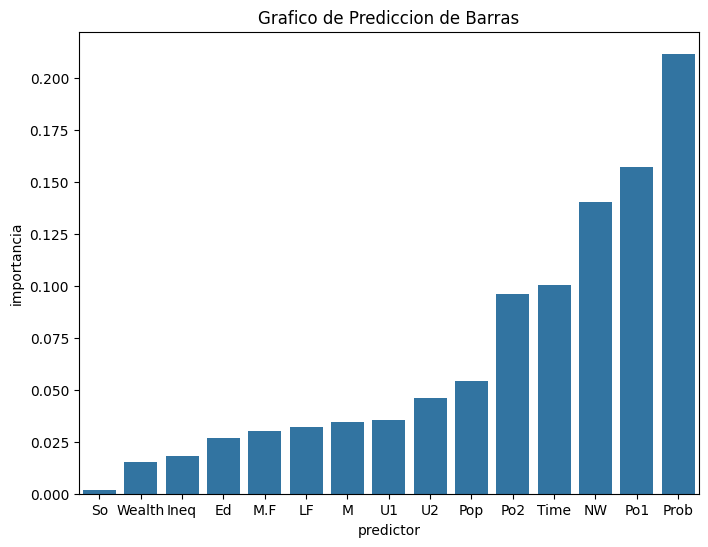

In [19]:
#preparando grafico
feature_importances = clasificacion.feature_importances_

feature_importance_data = pd.DataFrame({
    'importancia':feature_importances,
    'predictor':predictores
}).sort_values(by='importancia', ascending=True)

#graficando
plt.figure(figsize=(8,6))
sns.barplot(y='importancia',x='predictor',data=feature_importance_data)
plt.title('Grafico de Prediccion de Barras')
plt.show()

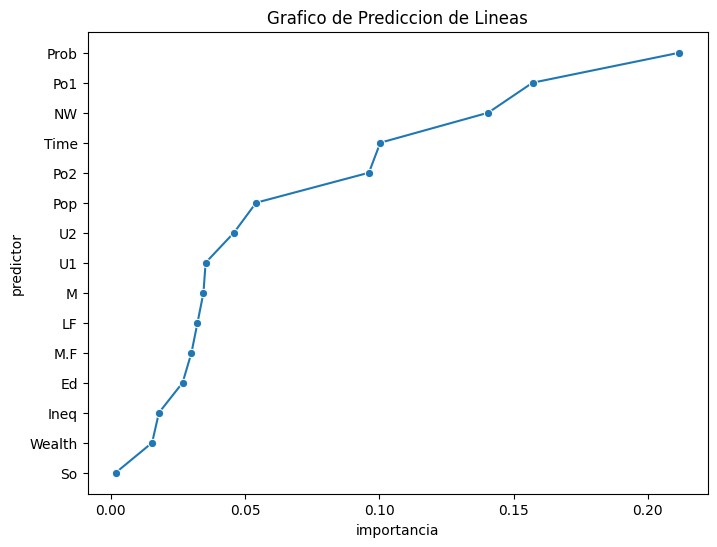

In [20]:
feature_importance_data = pd.DataFrame({
    'importancia':feature_importances,
    'predictor':predictores
}).sort_values(by='importancia', ascending=False)

plt.figure(figsize=(8, 6))
sns.lineplot(x='importancia', y='predictor', data=feature_importance_data, marker='o')
plt.title('Grafico de Prediccion de Lineas')
plt.show()

#### Interpretacion
<p>Despues de evaluar varias graficas, tomando el modelo de RandomForestRegression, decidiendo evaluar un grafico de lineas y tambien un grafico de barras se han observado 5 variables relacionadas a razon de esto las cuales son:</p>
<ul>
  <li>Po1</li>
  <li>NW</li>
  <li>Po2</li>
  <li>Time</li>
  <li>Prob</li>
</ul>

<p>En estos graficos se pueden percibir que personas no blancas que han tenido mayor tiempo en carcel en su primera vez antes de su liberacion cuenta con mayor probabilidad de encarcelamiento.</p>

<p>Pero a su vez se puede determinar que personas en lugares deprimidos con baja poblacion no blancos desempleados mayores a 35 anios tienen mas probabilidad de ser encarcelados considerando que sean no blancos y fueron encarcelados previamente.</p>

#### Prediciendo Caso Especifico

In [21]:
# preparando prediccion
modelo = joblib.load('random_forest_model.pkl')

casoEspecifico = pd.DataFrame({
    'M': [14.0],
    'So': [0],
    'Ed': [10.0],
    'Po1': [12.0],
    'Po2': [15.5],
    'LF': [0.640],
    'M.F': [94.0],
    'Pop': [150],
    'NW': [1.1],
    'U1': [0.12],
    'U2': [3.6],
    'Wealth': [3200],
    'Ineq': [20.1],
    'Prob': [0.04],
    'Time': [39.0]
})

prediccionPosibilidadCrimen = modelo.predict(casoEspecifico)

In [22]:
# mostrnado resultado
cadena = ''
for row in casoEspecifico.columns:
  cadena += row+' | '
print("\nREGRESORES: | "+cadena)

# Evaluate the model
mse = mean_squared_error(ytest, yprediccion)
mae = mean_absolute_error(ytest, yprediccion)
r2 = r2_score(ytest, yprediccion)

print('\nMean Squared Error: %0.2f' % mse)
print('\nMean Absolute Error: %0.2f' % mae)
print('\nR² Score: %0.2f' % (r2*100)+'%')
print('\nTasa Prediccion Posibilidad Crimen: %0.2f' % (prediccionPosibilidadCrimen[0]/10)+'%')


REGRESORES: | M | So | Ed | Po1 | Po2 | LF | M.F | Pop | NW | U1 | U2 | Wealth | Ineq | Prob | Time | 

Mean Squared Error: 125861.09

Mean Absolute Error: 219.77

R² Score: 31.33%

Tasa Prediccion Posibilidad Crimen: 98.24%
